In [1]:
%matplotlib inline

import pandas as pd

In [4]:
papers = pd.read_csv('/home/devil/Downloads/papers.csv')
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1)

In [6]:
import re# Remove punctuation
papers['paper_text_processed'] = papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))# Convert the titles to lowercase
papers['paper_text_processed'] = papers['paper_text_processed'].map(lambda x: x.lower())# Print out the first rows of papers
# papers['paper_text_processed'].head()

0    767\n\nself-organization of associative databa...
1    683\n\na mean field theory of layer iv of visu...
2    394\n\nstoring covariance by the associative\n...
3    bayesian query construction for neural\nnetwor...
4    neural network ensembles cross\nvalidation and...
Name: paper_text_processed, dtype: object

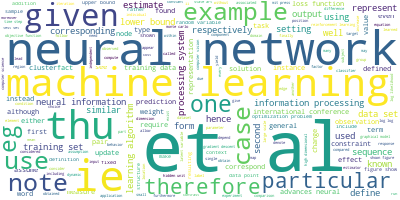

In [9]:
# Import the wordcloud library
from wordcloud import WordCloud# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

In [2]:
import urllib3
import requests
from bs4 import BeautifulSoup as bs
import click
from os import path, makedirs
from glob import glob
from time import sleep

headers = requests.utils.default_headers()
headers['User-Agent'] = 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.87 Safari/537.36'


In [3]:
pid = '33334313'
http = urllib3.PoolManager()
page = http.request('GET', f"https://pubmed.ncbi.nlm.nih.gov/{pid}/")
print(f"Featching {pid} data")
soup = bs(page.data, "html.parser")
lks = soup.find_all("a", attrs={"data-ga-category":"full_text"})
links = {}
print(f"Extracting PMCID and DOI for {pid}")
print(lks)
# return
for link in lks:
     if link.attrs['data-ga-action'] == "PMID":
         continue
     links[link.attrs['data-ga-action']] = link.attrs['href']


Featching 33334313 data
Extracting PMCID and DOI for 33334313
[<a class="link-item dialog-focus" data-ga-action="BioMed Central" data-ga-category="full_text" data-ga-label="33334313" href="https://bmcgenomics.biomedcentral.com/articles/10.1186/s12864-020-07239-w" ref="linksrc=fulltextorjournal_fulltext&amp;is_pmc=False&amp;PrId=3196&amp;itool=Abstract-def&amp;log$=linkouticon&amp;uid=33334313&amp;db=pubmed&amp;nlmid=100965258" rel="noopener" target="_blank" title="See full text options at BioMed Central"><img alt="full-text provider logo" src="https://cdn.ncbi.nlm.nih.gov/corehtml/query/egifs/https:--s3-service-broker-live-ddda94b7-dbb0-4917-917d-776dae91ebba.s3.amazonaws.com-bmc-linkout-fulltext.png"/><span class="text">
            
              BioMed Central
            
          </span></a>, <a class="link-item pmc" data-ga-action="PMC" data-ga-category="full_text" data-ga-label="33334313" href="https://www.ncbi.nlm.nih.gov/pmc/articles/pmid/33334313/" ref="linksrc=fulltextorjou

In [9]:
links

{'BioMed Central': 'https://bmcgenomics.biomedcentral.com/articles/10.1186/s12864-020-07239-w',
 'PMC': 'https://www.ncbi.nlm.nih.gov/pmc/articles/pmid/33334313/',
 'PMCID': 'http://www.ncbi.nlm.nih.gov/pmc/articles/pmc7745412/',
 'DOI': 'https://doi.org/10.1186/s12864-020-07239-w'}

In [20]:
if "PMCID" in links:
    pmc_data = http.request('GET', links['PMCID'])
    pmc_soup = bs(pmc_data.data, "html.parser")
    plinks = []
    print(plinks)
    try:
        for link in pmc_soup.find_all("a")+pmc_soup.find_all("link"):
            if link.attrs['href'].lower().endswith(".pdf"):
                plinks.append("https://www.ncbi.nlm.nih.gov"+link.attrs['href'])
        plinks = list(set(plinks))
        if len(plinks) ==0 :
            pass
#             return pid
        if len(plinks) == 1:
            r = requests.get(plinks[0], headers=headers)
            with open(f"{outd}/{pid}.pdf", 'wb') as f:
                f.write(r.content)
        else:
            for i, lk in enumerate(plinks):
                r = requests.get(lk, headers=headers)
                with open(f"{outd}/{pid}_{i}.pdf", 'wb') as f:
                    f.write(r.content)
                sleep(5)
    except:
        pass
#         return pid

# elif "DOI" in links:
#     try:
#         alt_data = http.request('GET', links['DOI'],headers=headers)
#         alt_soup = BeautifulSoup(alt_data.data, "html.parser")
#         alt_links = []
#         for link in alt_soup.find_all("a"):
#             if link.attrs['href'].lower().endswith(".pdf"):
#                 alt_links.append(link.attrs['href'])
#         plinks = list(set(alt_links))
#         if len(plinks) ==0 :
#             return pid
#         if len(plinks) == 1:
#             r = requests.get(plinks[0], headers=headers)
#             with open(f"{outd}/{pid}.pdf", 'wb') as f:
#                 f.write(r.content)
#         else:
#             for i, lk in enumerate(plinks):
#                 r = requests.get(lk, headers=headers)
#                 with open(f"{outd}/{pid}_{i}.pdf", 'wb') as f:
#                     f.write(r.content)
#                 sleep(5)
#     except:
#         return pid


[]


In [21]:
plinks

[]

In [18]:
pmc_soup.find_all("a")+ pmc_soup.find_all("link")

[<a href="/guide/browsers/#enablejs" target="_blank" title="Learn how to enable JavaScript">more...</a>,
 <a accesskey="1" class="ui-ncbimenu-link-first" href="/" id="ncbihome" role="banner" title="NCBI Home"><span class="offscreen_noflow">NCBI</span><img alt="NCBI Logo" class="ncbi_logo" src="//static.pubmed.gov/portal/portal3rc.fcgi/4160049/img/28977" title="NCBI"/></a>,
 <a accesskey="3" href="#maincontent" tabindex="0" title="Skip to the content">Skip to main
                         content</a>,
 <a accesskey="4" href="#navcontent" tabindex="0" title="Skip to the navigation">Skip to
                         navigation</a>,
 <a class="ui-ncbimenu-first-link-has-submenu ui-ncbimenu-link-first topanchor expandDown" href="/static/header_footer_ajax/submenu/#resources">Resources</a>,
 <a class="ui-ncbimenu-first-link-has-submenu ui-ncbimenu-link-first topanchor expandDown" href="/static/header_footer_ajax/submenu/#howto">How To</a>,
 <a accesskey="0" href="/guide/browsers/#accesskeys" 

In [7]:
pmc_soup

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
<head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<!-- AppResources meta begin -->
<script type="text/javascript">var ncbi_startTime = new Date();</script>
<!-- AppResources meta end -->
<!-- TemplateResources meta begin -->
<meta content="" name="paf_template"/>
<!-- TemplateResources meta end -->
<!-- Logger begin -->
<meta content="pmc" name="ncbi_db"/><meta content="article" name="ncbi_pdid"/><meta content="" name="ncbi_acc"/><meta content="bmcgeno" name="ncbi_domain"/><meta content="record" name="ncbi_report"/><meta content="fulltext" name="ncbi_type"/><meta content="" name="ncbi_objectid"/><meta content="/articles/PMC7745412/" name="ncbi_pcid"/><meta content="pmc" name="ncbi_app"/>
<!-- Logger end -->
<title>Deep neural networks 